In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
%matplotlib inline

In [2]:
female_birth_data=pd.read_csv("daily-total-female-births-CA.csv") # This is a free datset

In [3]:
female_birth_data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
birth_data=pd.read_csv("daily-total-female-births-CA.csv", index_col=[0], parse_dates=[0])

In [5]:
birth_data.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


<Axes: xlabel='date'>

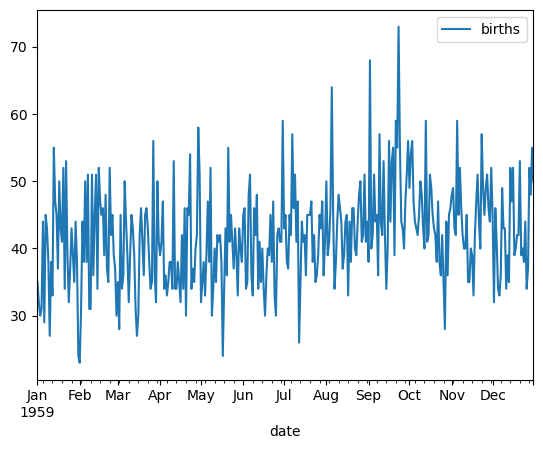

In [6]:
birth_data.plot() #almost a stationary series

In [7]:
# also called as smoothing

moving_average_birth=birth_data.rolling(window=20).mean()  # window: This is the number of observations used for calculating the statistic. 

In [8]:
moving_average_birth

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
...,...
1959-12-27,42.10
1959-12-28,42.25
1959-12-29,42.50


<Axes: xlabel='date'>

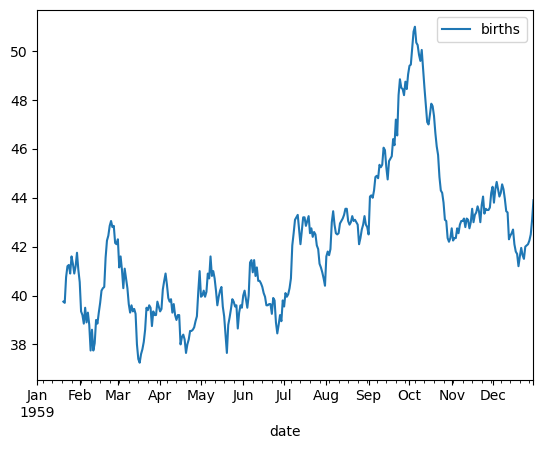

In [9]:
moving_average_birth.plot() # we can see that there is a peak in the month of october

In [10]:
sm.stats.durbin_watson(birth_data) # very less correlation

array([0.04624491])

C:\Users\gavth\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


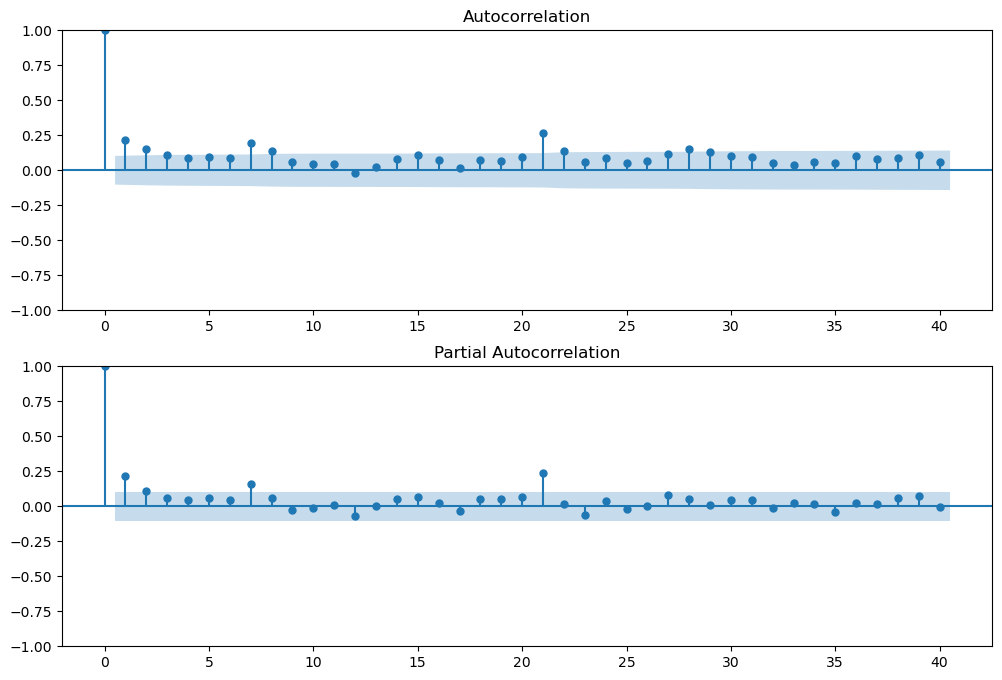

In [11]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(birth_data.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(birth_data, lags=40, ax=ax2)

In [12]:
training_data=birth_data[0:320]
test_data=birth_data[320:]

In [14]:

from sklearn.model_selection import train_test_split
t_x,t=train_test_split(birth_data)


In [16]:
from statsmodels.tsa.arima_model import ARIMA

In [17]:
from statsmodels.tsa.

SyntaxError: invalid syntax (841411778.py, line 1)

In [20]:
arima= ARIMA(training_data,order=(2,1,3))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [21]:
model=arima.fit()

NameError: name 'arima' is not defined

In [ ]:
model.aic

In [ ]:
pred= model.forecast(steps=45)[0]

In [ ]:
pred

In [19]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(test_data,pred))